In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LassoCV

In [2]:
# Load the dataset
df = pd.read_csv('churn_clean.csv', index_col=0)
#Check Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income                10

In [3]:
df.head(5)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
# Handle missing values and outliers
print("Initial Missing Values:")
print(df.isnull().sum())

# Identify columns with missing values
columns_with_missing = df.columns[df.isnull().any()]

# Replace missing values or drop rows/columns as needed
# Impute missing values for numerical columns (replace with mean)
for col in columns_with_missing:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        df[col].fillna(df[col].mean(), inplace=True)

# Impute missing values for categorical columns (replace with mode)
for col in columns_with_missing:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
# Display information about missing values after imputation
print("\nMissing Values After Imputation:")
print(df.isnull().sum())

Initial Missing Values:
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport        

In [5]:
#Categorical Columns to Numeric
categorical_columns = ['Techie','Port_modem','Churn','OnlineSecurity','DeviceProtection', 'TechSupport', 'PaperlessBilling', 'Tablet', 'Phone', 'Multiple', 'OnlineBackup', 'StreamingTV', 'StreamingMovies']
for column in categorical_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

In [6]:
#Format
df['Age'] = df['Age'].fillna(0).astype(int)
df['Lng'] = df['Lng'].fillna(0).abs()

In [7]:
area_mapping = {'Urban': 0,'Suburban': 1,'Rural': 2}
marital_mapping = {'Widowed': 0,'Married': 1,'Separated': 2,'Never Married': 3,'Divorced' :4}
gender_mapping = {'Male':0,'Female': 1,'Prefer not to answer': 2}
contract_mapping = {'One year': 0,'Month-to-month': 1,'Two Year': 2}
InternetService_mapping = {'DSL': 0,'Fiber Optic': 1,'None': 2}
PaymentMethod_mapping = {'Bank Transfer(automatic)': 0,'Credit Card (automatic)': 1,'Mailed Check': 2, 'Electronic Check': 3}



df['Area'] = df['Area'].map(area_mapping)
df['Marital'] = df['Marital'].map(marital_mapping)
df['Gender'] = df['Gender'].map(gender_mapping)
df['Contract'] = df['Contract'].map(contract_mapping)
df['InternetService'] = df['InternetService'].map(InternetService_mapping)
df['PaymentMethod'] = df['PaymentMethod'].map(PaymentMethod_mapping)

In [8]:
#Missing Values
df['Gender']= df['Gender'].fillna(df['Gender'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  int64  
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int32  
 15  Income                10

In [9]:
regress_df=df[['Churn','Gender', 'Age', 'StreamingMovies', 'MonthlyCharge', 'Tenure', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Item1', 'Item2']]

In [10]:
# Save the cleaned dataset to a new CSV file
regress_df.to_csv('cleaned_churn_data.csv', index=False)

In [11]:
# Load the new dataset
data = pd.read_csv('cleaned_churn_data.csv')
#Check Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Churn                 10000 non-null  int64  
 1   Gender                10000 non-null  float64
 2   Age                   10000 non-null  int64  
 3   StreamingMovies       10000 non-null  int64  
 4   MonthlyCharge         10000 non-null  float64
 5   Tenure                10000 non-null  float64
 6   Outage_sec_perweek    10000 non-null  float64
 7   Email                 10000 non-null  int64  
 8   Contacts              10000 non-null  int64  
 9   Yearly_equip_failure  10000 non-null  int64  
 10  Item1                 10000 non-null  int64  
 11  Item2                 10000 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 937.6 KB


In [12]:
# Handle missing values and outliers
print("Initial Missing Values:")
print(data.isnull().sum())

# Identify columns with missing values
columns_with_missing = data.columns[data.isnull().any()]


Initial Missing Values:
Churn                   0
Gender                  0
Age                     0
StreamingMovies         0
MonthlyCharge           0
Tenure                  0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Item1                   0
Item2                   0
dtype: int64


In [13]:
# Summary dependent variables
data['Churn'].value_counts()
data['Churn'].describe()

count    10000.000000
mean         0.265000
std          0.441355
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Churn, dtype: float64

In [14]:
# Summary independent variables
independent_variables = ['Gender', 'Age', 'StreamingMovies', 'MonthlyCharge', 'Tenure', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Item1', 'Item2']
data[independent_variables].describe()

,Gender,Age,StreamingMovies,MonthlyCharge,Tenure,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Item1,Item2
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.525600,53.078400,0.489000,172.624816,34.526188,10.001848,12.016000,0.994200,0.398000,3.490800,3.505100
std,0.499369,20.698882,0.499904,42.943094,26.443063,2.976019,3.025898,0.988466,0.635953,1.037797,1.034641
min,0.000000,18.000000,0.000000,79.978860,1.000259,0.099747,1.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,35.000000,0.000000,139.979239,7.917694,8.018214,10.000000,0.000000,0.000000,3.000000,3.000000
50%,1.000000,53.000000,0.000000,167.484700,35.430507,10.018560,12.000000,1.000000,0.000000,3.000000,4.000000
75%,1.000000,71.000000,1.000000,200.734725,61.479795,11.969485,14.000000,2.000000,1.000000,4.000000,4.000000
max,1.000000,89.000000,1.000000,290.160419,71.999280,21.207230,23.000000,7.000000,6.000000,7.000000,7.000000


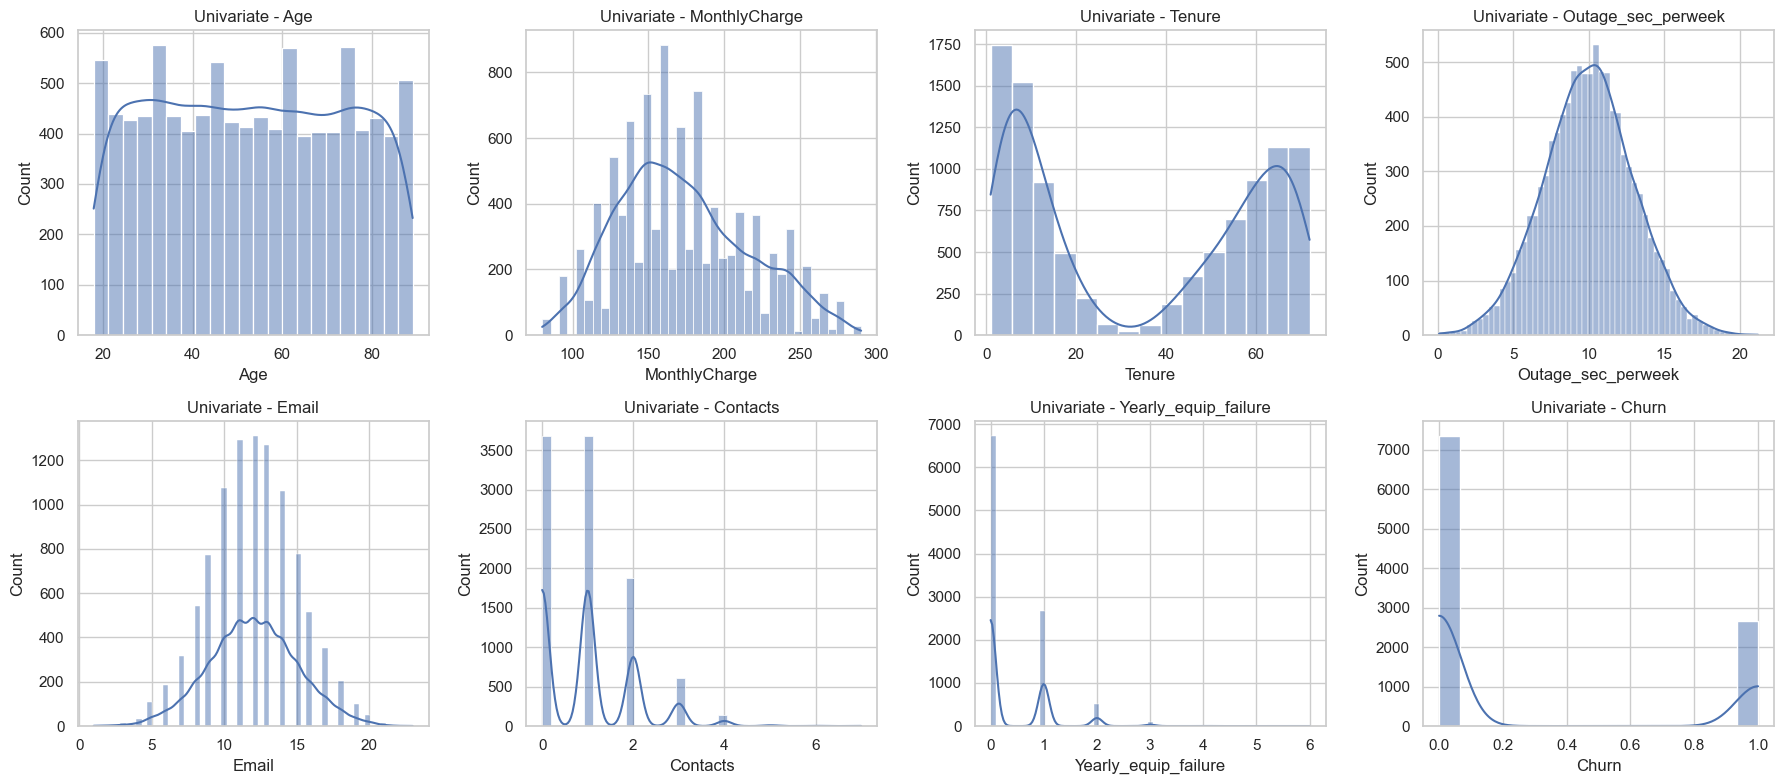

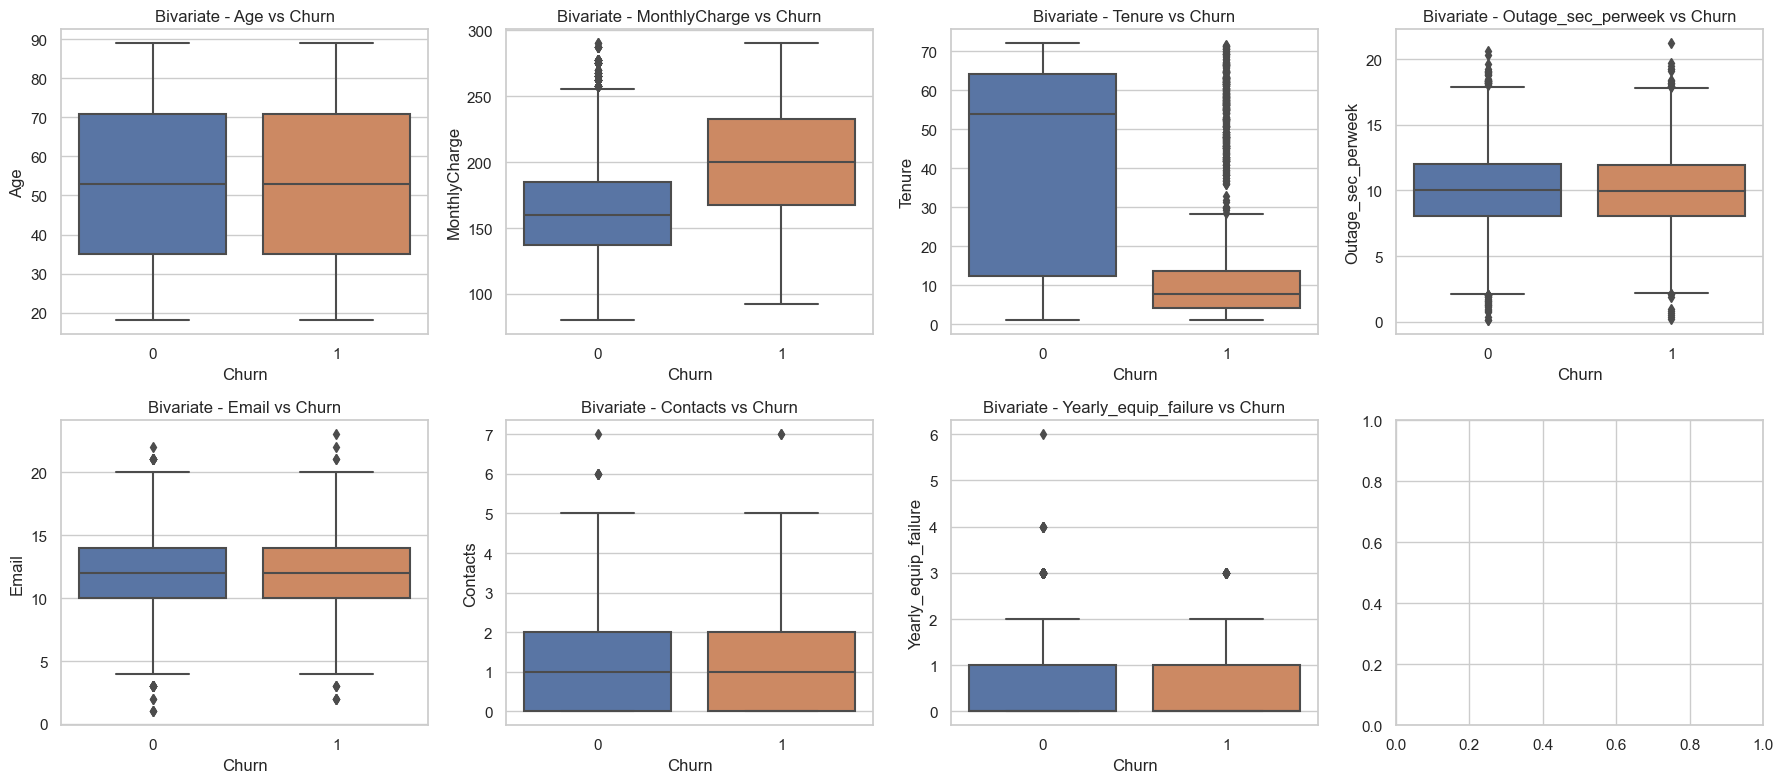

In [15]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Select variables for analysis
variables = ['Age', 'MonthlyCharge', 'Tenure', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Churn']

# Univariate Visualizations
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 8))

for i, var in enumerate(variables):
    sns.histplot(data[var], kde=True, ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f'Univariate - {var}')

plt.tight_layout()
plt.show()

# Bivariate Visualizations
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 8))

for i, var in enumerate(variables[:-1]):
    sns.boxplot(x='Churn', y=var, data=data, ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f'Bivariate - {var} vs Churn')

plt.tight_layout()
plt.show()


In [16]:
#Initial Multiple Linear Regression Model

X = data[['Gender', 'Age', 'StreamingMovies', 'MonthlyCharge', 'Tenure', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Item1', 'Item2']]
y = data['Churn']
#X = sm.add_constant(X)  
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Churn   R-squared (uncentered):                   0.545
Model:                            OLS   Adj. R-squared (uncentered):              0.544
Method:                 Least Squares   F-statistic:                              1086.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):                        0.00
Time:                        11:10:45   Log-Likelihood:                         -3616.1
No. Observations:               10000   AIC:                                      7254.
Df Residuals:                    9989   BIC:                                      7334.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [17]:
results.resid.std(ddof=X.shape[1])

0.34757389415171874

In [18]:

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)


                Variable        VIF
0                 Gender   2.075020
1                    Age   6.913693
2        StreamingMovies   2.963518
3          MonthlyCharge  20.504194
4                 Tenure   2.642830
5     Outage_sec_perweek  10.378105
6                  Email  13.066506
7               Contacts   1.988683
8   Yearly_equip_failure   1.384100
9                  Item1  21.309793
10                 Item2  21.586700


In [19]:
# Function to calculate VIF and drop variables with VIF above a threshold
def calculate_vif(data, threshold=11):
    variables = list(range(data.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(data.iloc[:, variables].values, i) for i in range(data.iloc[:, variables].shape[1])]
        max_vif = max(vif)
        if max_vif > threshold:
            max_vif_index = vif.index(max_vif)
            del variables[max_vif_index]
            dropped = True
    remaining_vars = data.columns[variables]
    return data[remaining_vars]

# Apply VIF-based feature selection
X_vif_filtered = calculate_vif(X, threshold=11)

# Fit Lasso regression model on the filtered features
lasso_model = LassoCV()
lasso_model.fit(X_vif_filtered, y)

# Get selected feature coefficients
selected_coeffs = lasso_model.coef_

# Get selected feature names
selected_features_lasso = X_vif_filtered.columns[selected_coeffs != 0]

# Display selected features using Lasso
print("Selected Features (Lasso):", selected_features_lasso)


Selected Features (Lasso): Index(['Age', 'StreamingMovies', 'Tenure'], dtype='object')


In [20]:

# Updated Multiple Linear Regression Model with selected variables
X_selected = data[['Gender', 'Age', 'StreamingMovies', 'Tenure', 'Contacts', 'Yearly_equip_failure']]
y = data['Churn']
X_selected = sm.add_constant(X_selected)  # Adding a constant term
model_selected = sm.OLS(y, X_selected)
results_selected = model_selected.fit()

# Calculate VIF for each variable
vif_data_selected = pd.DataFrame()
vif_data_selected["Variable"] = X_selected.columns
vif_data_selected["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]

# Display the VIF values after feature selection
print(results_selected.summary())
print(vif_data_selected)


                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     781.1
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:10:45   Log-Likelihood:                -4087.0
No. Observations:               10000   AIC:                             8188.
Df Residuals:                    9993   BIC:                             8238.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4164 

In [21]:
# Calculate the residual standard deviation
residual_std = results_selected.resid.std()

# Display the residual standard deviation
print("Residual Standard Deviation:", residual_std)

Residual Standard Deviation: 0.3641502609902056


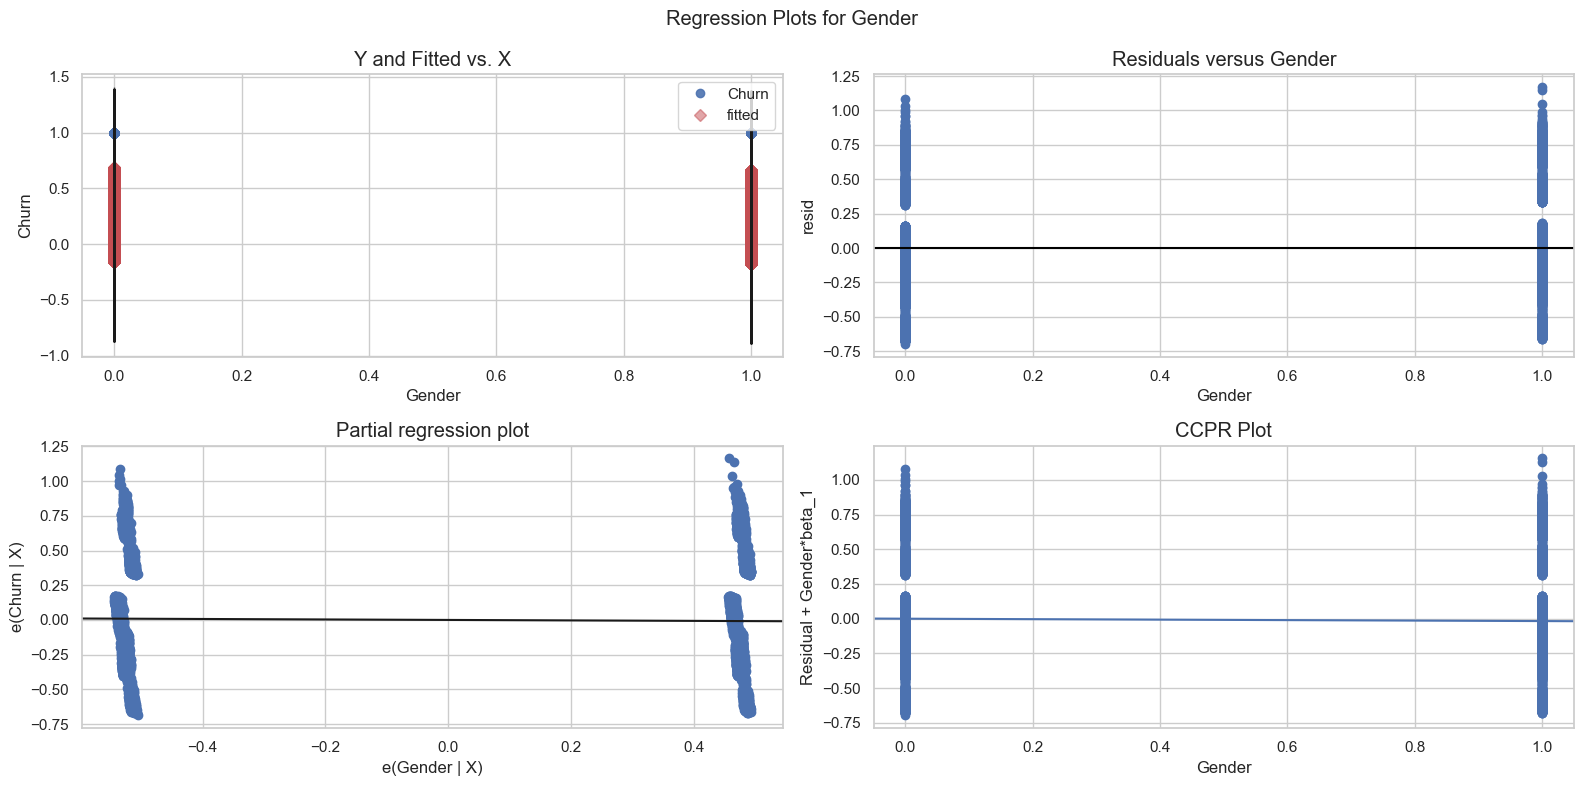

In [22]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results_selected, 'Gender', fig=fig);

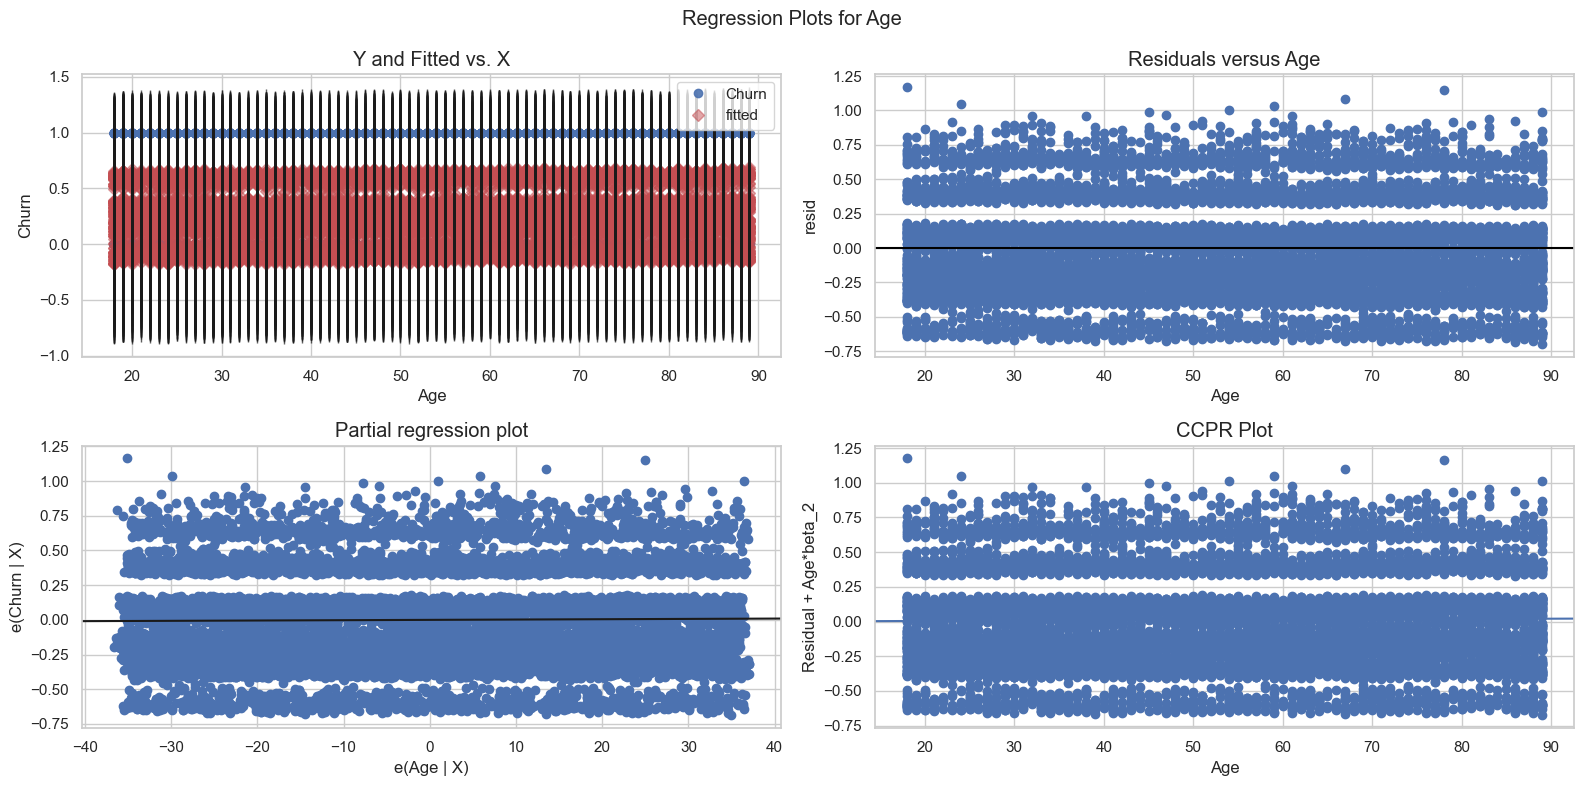

In [23]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results_selected, 'Age', fig=fig);

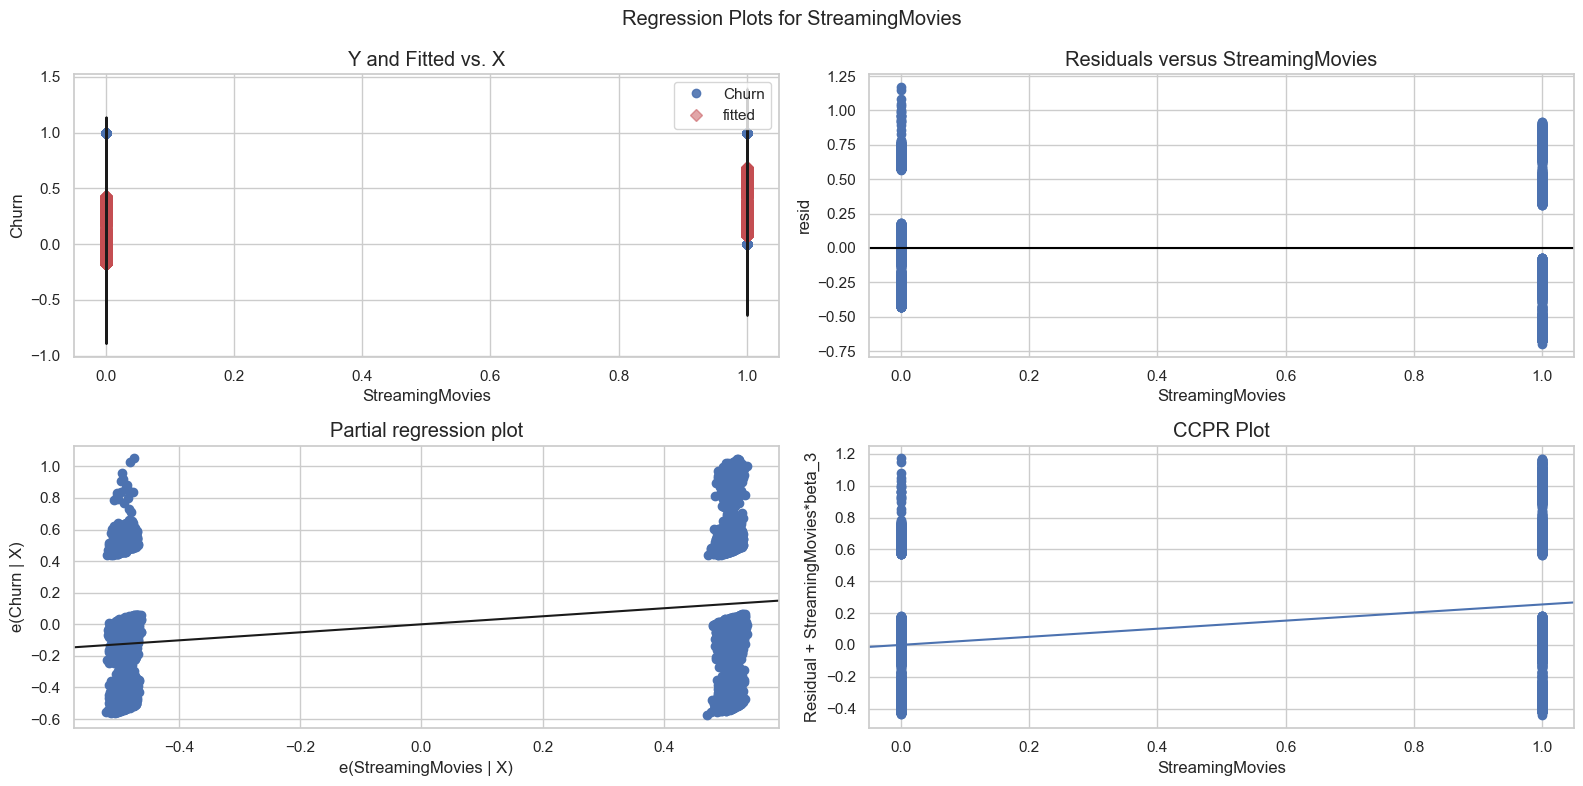

In [24]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results_selected, 'StreamingMovies', fig=fig);

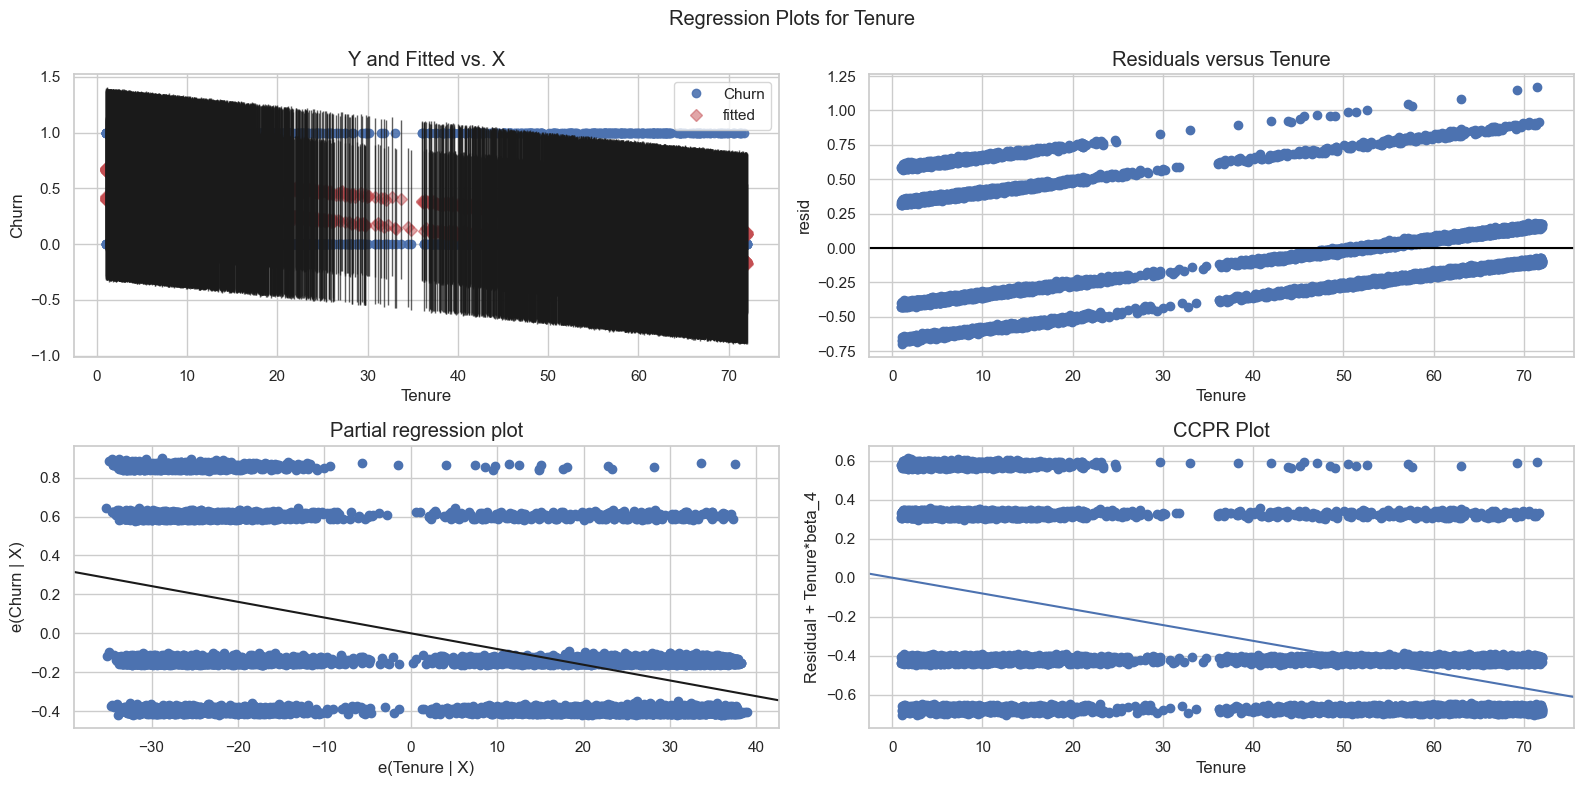

In [25]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results_selected, 'Tenure', fig=fig);

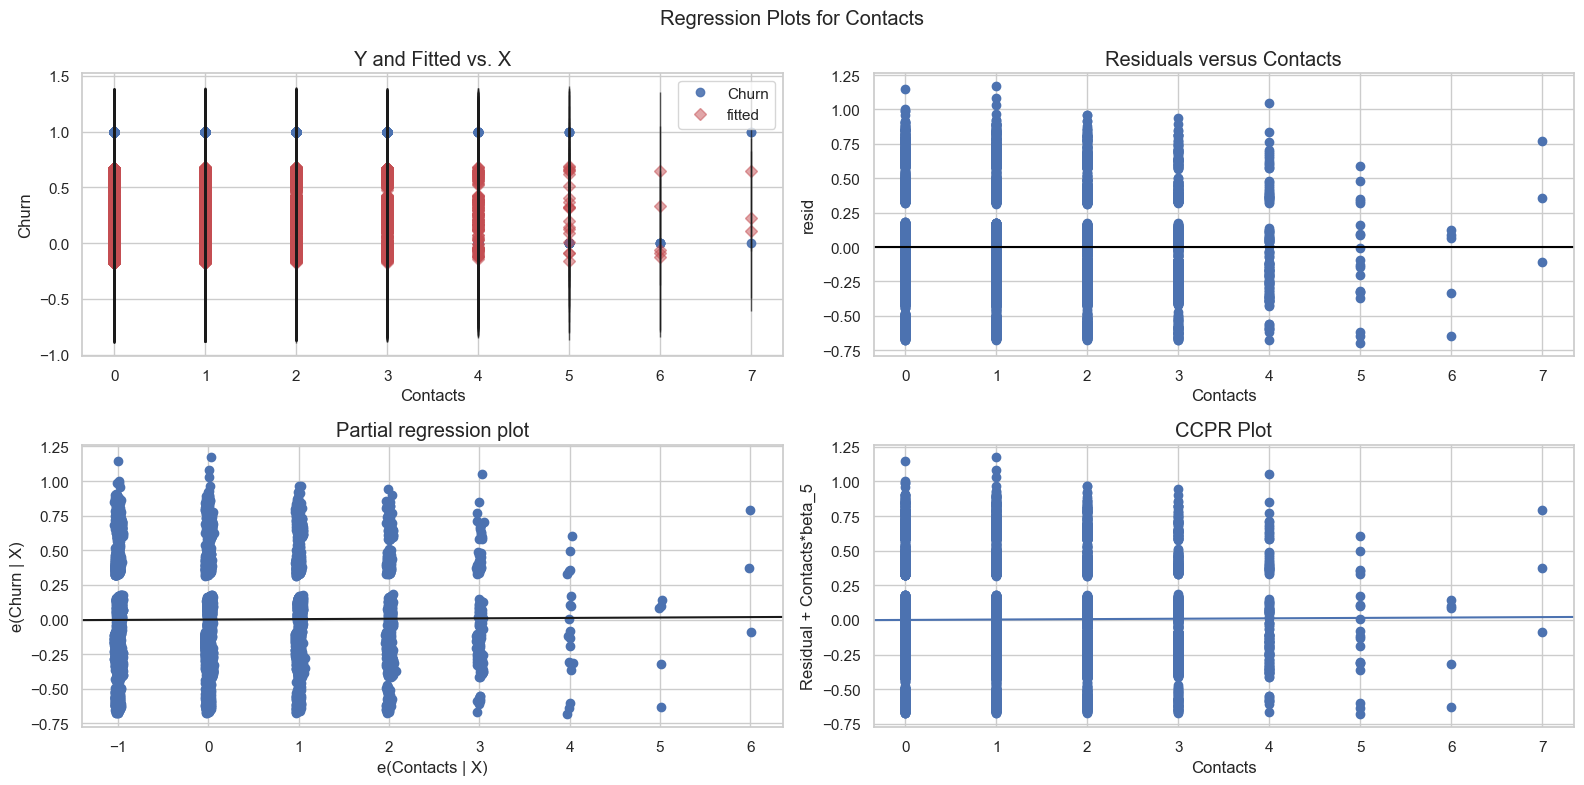

In [26]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results_selected, 'Contacts', fig=fig);

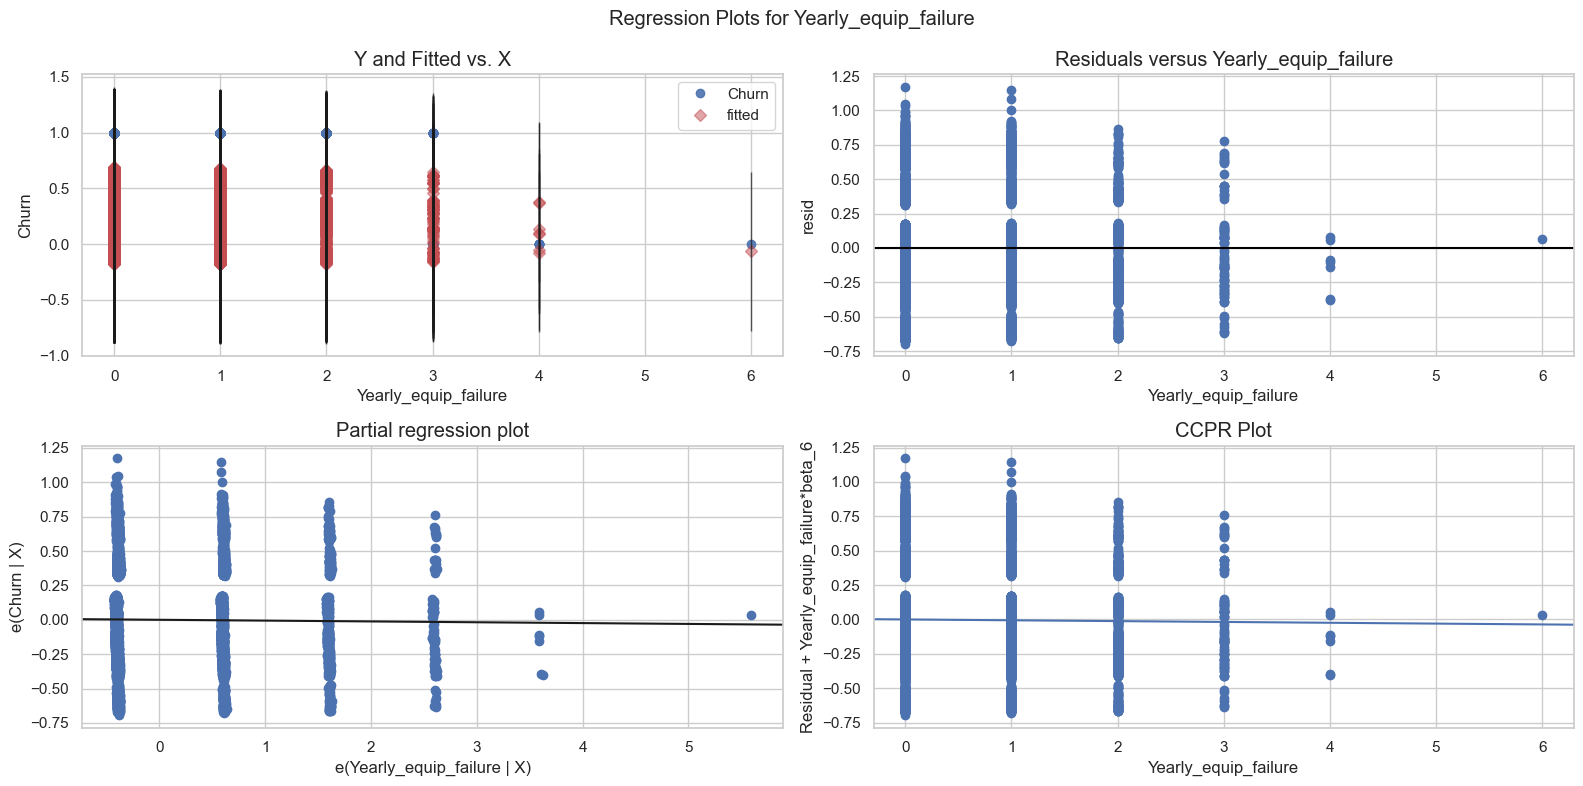

In [27]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results_selected, 'Yearly_equip_failure', fig=fig);